Extracted files: ['AirQualityUCI.xlsx', 'AirQualityUCI.csv']
Top 5 Reasons for Air Quality Issues (Pollutants):
NOx(GT)     246.896735
NO2(GT)     113.091251
C6H6(GT)     10.083105
CO(GT)        2.152750
dtype: float64

Day of the Week with Most Air Quality Issues:
Friday

Maximum Air Quality Levels:
CO(GT)        11.9
C6H6(GT)      63.7
NOx(GT)     1479.0
NO2(GT)      340.0
dtype: float64

Minimum Air Quality Levels:
CO(GT)      0.1
C6H6(GT)    0.1
NOx(GT)     2.0
NO2(GT)     2.0
dtype: float64

Highest Temperature Recorded: 44.6
Lowest Temperature Recorded: -1.9

Cluster Centers:
[[-0.76755076 -0.74377011 -0.69650892 -0.80473582]
 [ 0.18322708  0.18925961  0.09583703  0.38541169]
 [ 1.70832782  1.62513951  1.73222336  1.29153236]]


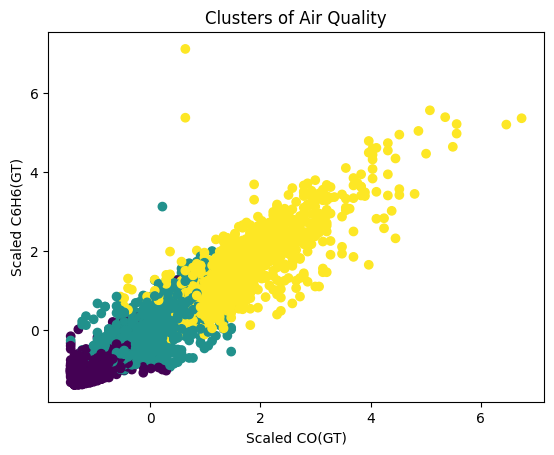

In [1]:
# Import necessary libraries
import pandas as pd
import zipfile
import os
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Extract the zip file
zip_file_path = '/content/air+quality.zip'  # Update the file path if needed
extracted_folder_path = '/content/air_quality_data'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Check extracted files
print("Extracted files:", os.listdir(extracted_folder_path))

# Step 2: Load the dataset
csv_file_path = os.path.join(extracted_folder_path, 'AirQualityUCI.csv')
data = pd.read_csv(csv_file_path, sep=';', decimal=',', na_values=-200, skipfooter=1, engine='python')

# Step 3: Data Cleaning
data_cleaned = data.drop(columns=['Unnamed: 15', 'Unnamed: 16'], errors='ignore')
data_cleaned.columns = [col.strip() for col in data_cleaned.columns]  # Remove trailing spaces

# Format 'Date' and 'Time'
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], format='%d/%m/%Y', errors='coerce')
data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], format='%H.%M.%S', errors='coerce').dt.time
data_cleaned = data_cleaned.dropna(subset=['Date', 'Time'])  # Remove invalid date/time rows

# Convert numeric columns to proper types
numeric_columns = data_cleaned.columns.difference(['Date', 'Time'])
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Add 'Day_of_Week' column
data_cleaned['Day_of_Week'] = data_cleaned['Date'].dt.day_name()

# Step 4: Top 5 Reasons for Air Quality Issues
pollutants = ['CO(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)']
top_pollutants = data_cleaned[pollutants].mean().sort_values(ascending=False).head(5)
print("Top 5 Reasons for Air Quality Issues (Pollutants):")
print(top_pollutants)

# Step 5: Day of the Week with Most Air Quality Issues
day_pollutants = data_cleaned.groupby('Day_of_Week')[pollutants].mean().sum(axis=1)
most_problematic_day = day_pollutants.idxmax()
print("\nDay of the Week with Most Air Quality Issues:")
print(most_problematic_day)

# Step 6: Max and Min Air Quality Levels
max_air_quality = data_cleaned[pollutants].max()
min_air_quality = data_cleaned[pollutants].min()
print("\nMaximum Air Quality Levels:")
print(max_air_quality)
print("\nMinimum Air Quality Levels:")
print(min_air_quality)

# Step 7: Highest and Lowest Temperatures
highest_temp = data_cleaned['T'].max()
lowest_temp = data_cleaned['T'].min()
print("\nHighest Temperature Recorded:", highest_temp)
print("Lowest Temperature Recorded:", lowest_temp)

# Step 8: Applying Clustering Model (KMeans)
clustering_data = data_cleaned[pollutants].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clustering_data['Cluster'] = kmeans.fit_predict(scaled_data)

print("\nCluster Centers:")
print(kmeans.cluster_centers_)

# Visualizing clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clustering_data['Cluster'], cmap='viridis')
plt.title('Clusters of Air Quality')
plt.xlabel('Scaled CO(GT)')
plt.ylabel('Scaled C6H6(GT)')
plt.show()
